<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 13: Explainable AI & Ethics**

In this session, we will cover:
1. Introduction to Explainable AI
2. SHAP (SHapley Additive exPlanations)
3. LIME (Local Interpretable Model-agnostic Explanations)
4. Grad-CAM (Gradient-weighted Class Activation Mapping)
5. Model Bias and Fairness
6. Accountability and AI Policy


# Introduction to Explainable AI

Explainable AI (XAI) refers to a set of techniques and methodologies developed to make the decisions and inner workings of complex machine learning models understandable to humans. Unlike traditional models such as linear regression or decision trees, which are inherently more interpretable, many modern AI systems—especially those based on deep learning—consist of many layers of non-linear transformations. This complexity makes it difficult to trace how specific input features contribute to the model's predictions, effectively turning them into "black boxes."

### The primary goals of XAI are to:

* **Improve Transparency**: Help users and developers understand how input data affects predictions.
* **Increase Trust**: When stakeholders can see a rationale behind AI decisions, they are more likely to trust and adopt the system.
* **Enhance Debugging and Validation**: XAI can help identify when models rely on spurious correlations or biased patterns in data.
* **Facilitate Regulatory Compliance**: In sectors like finance, healthcare, and law, explainability is essential for meeting ethical and legal standards.
* **Enable Fairness Audits**: Interpretable models allow for better analysis of potential bias and discrimination.

It's important to recognize the trade-offs between model accuracy and interpretability. Simpler, interpretable models may underperform compared to complex ones, but the added transparency may be worth it in critical domains.

### XAI is especially crucial in high-stakes applications such as:

* Medical diagnosis (e.g., why a model predicted a certain disease)
* Loan approvals (e.g., what factors led to rejection)
* Criminal justice (e.g., risk assessment scores for recidivism)

### To meet these goals, a variety of model-agnostic and model-specific tools have been developed, including:

* **SHAP (SHapley Additive exPlanations)**: A model-agnostic method based on cooperative game theory for feature attribution.
* **LIME (Local Interpretable Model-agnostic Explanations)**: Uses local surrogate models to approximate predictions.
* **Grad-CAM (Gradient-weighted Class Activation Mapping)**: A model-specific technique for generating visual explanations in convolutional neural networks.

# SHAP (SHapley Additive exPlanations)

SHAP is a game-theoretic approach to explaining the output of any machine learning model. It connects optimal credit allocation with local feature attributions by leveraging Shapley values from cooperative game theory—originally developed to determine fair payouts to players depending on their contribution to a group outcome.

### Key Concepts:

- **Features as Players**: Each input feature is treated as a "player" in a coalition game where the model’s prediction is the total "payout."
- **Marginal Contributions**: The contribution of a feature is computed by averaging its marginal effect on the model’s output over all possible feature combinations.
- **Local and Global Interpretability**:
  - **Local**: Explains individual predictions.
  - **Global**: Aggregates local attributions across the dataset to assess overall feature importance.

### Advantages of SHAP:

- **Axiomatic Foundation**: Satisfies properties like local accuracy, missingness, and consistency, making the explanations mathematically sound.
- **Model-agnostic and Model-specific Implementations**:
  - Model-agnostic: Kernel SHAP (based on LIME-like approximation).
  - Model-specific: TreeSHAP (for tree ensembles), DeepSHAP (for neural networks), etc.
- **Visualizations**:
  - Force plots (for local explanations)
  - Summary plots (feature importance across data)
  - Dependence plots (partial dependence with attribution context)

### Limitations to Note:

- Computationally expensive for large models or high-dimensional data (especially Kernel SHAP).
- Interpretation depends on how the background dataset is chosen for computing expectations.

The UCI Heart Disease dataset available on Kaggle is a widely used resource for developing and testing machine learning models in medical diagnostics. Originally sourced from the UCI Machine Learning Repository, the dataset contains patient-level information including age, sex, chest pain type, blood pressure, cholesterol levels, ECG results, heart rate, and other clinical indicators. It is commonly used for binary classification tasks to predict whether a patient has heart disease based on these attributes. The Kaggle version includes slight preprocessing, such as encoding categorical values and unifying data from different collection sites like Cleveland and Hungary. This dataset remains a benchmark for interpretable machine learning techniques such as SHAP and LIME: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data

This notebook loads and preprocesses a heart disease dataset by handling missing values, encoding categorical variables, and creating a binary target. It then trains a Random Forest classifier to predict heart disease presence, evaluates the model's performance, and uses SHAP to interpret and visualize the impact of each feature on the model's predictions.

Columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


<ipython-input-23-2852a6b2cdd2>:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


Accuracy: 0.8097826086956522
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        82
           1       0.79      0.90      0.84       102

    accuracy                           0.81       184
   macro avg       0.82      0.80      0.80       184
weighted avg       0.82      0.81      0.81       184



<Figure size 640x480 with 0 Axes>

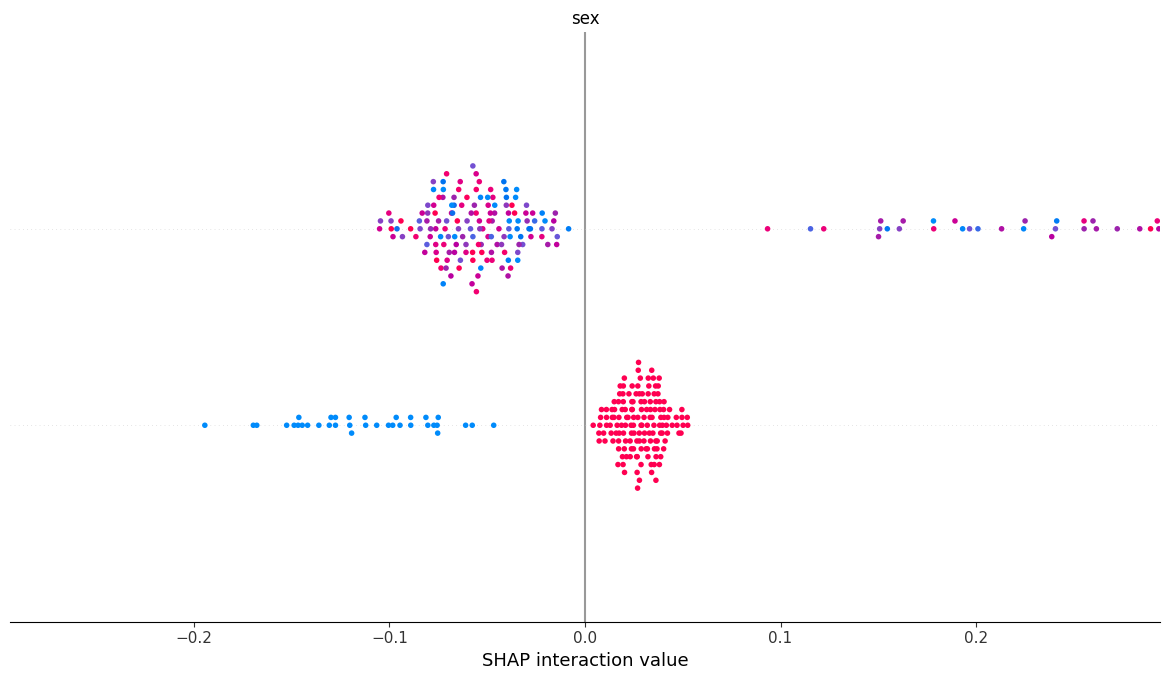

In [ ]:
# --- Install (if running in Colab or similar) ---
# !pip install shap pandas scikit-learn matplotlib seaborn

import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# --- Load Dataset ---
df = pd.read_csv("/content/heart_disease_uci.csv", sep=",")
df.columns = df.columns.str.strip()  # Remove any extra whitespace from headers
print("Columns:", df.columns.tolist())

# --- Drop Irrelevant Columns ---
df.drop(columns=["id", "dataset"], errors="ignore", inplace=True)

# --- Handle Missing Values ---
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# --- Create Binary Target Variable ---
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)

# --- Handle TRUE/FALSE and Encode Categorical Columns ---
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()  # Strip spaces
    df[col] = df[col].map({'TRUE': 1, 'FALSE': 0}).fillna(df[col])  # Handle booleans if present

# Label encode any remaining object columns
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# --- Convert TRUE/FALSE columns to 1/0 ---
df["fbs"] = df["fbs"].map({"TRUE": 1, "FALSE": 0})
df["exang"] = df["exang"].map({"TRUE": 1, "FALSE": 0})

# Fill any remaining NaNs (in case of unexpected values)
df["fbs"] = df["fbs"].fillna(0).astype(int)
df["exang"] = df["exang"].fillna(0).astype(int)



# --- Ensure All Columns Are Numeric ---
assert all(np.issubdtype(dtype, np.number) for dtype in df.dtypes), "Non-numeric column found!"


# --- Split Data ---
X = df.drop(columns="target")
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Train Model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Evaluate Model ---
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# --- SHAP Explanation ---
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)


# --- Global Summary Plot ---
shap.summary_plot(shap_values, X_test)

# --- Force Plot for Class 1 (positive class) ---
shap.initjs()

# Extract for class 1 (positive class = index 1)
base_value = explainer.expected_value[1]
shap_vals = shap_values.values[0][:, 1]  # First instance, class 1 SHAP values
features = X_test.iloc[0:1]              # Must be a DataFrame

# Reshape shap_vals for 2D compatibility
shap_vals = shap_vals.reshape(1, -1)

# Plot
shap.plots.force(base_value, shap_vals, features)




### SHAP Interpretation Summary

The SHAP visualizations provide a comprehensive view of how the feature sex contributes to the model's prediction for heart disease. In the SHAP interaction plot, we see a distinct separation between male (red) and female (blue) instances. Male individuals (sex = 1) cluster around positive SHAP interaction values, indicating a positive contribution to predicting heart disease, whereas female individuals (sex = 0) generally contribute negatively—pushing the prediction toward "no disease." This reflects the model's learned pattern that sex is an important risk factor, but it also raises questions of potential bias that warrant further analysis.

The SHAP force plot for a specific prediction reinforces this insight. It shows that features like slope = 1, sex = 1, and cp = 0 pushed the model toward a higher risk prediction (final model output = 0.59), while features like oldpeak = 0, chol = 206, and age = 49 pushed in the opposite direction. The model started at a base value of ~0.51 and moved toward the final prediction based on these additive feature attributions.

Together, these plots illustrate both global trends (e.g., how sex behaves across the dataset) and local justifications (why the model made a specific prediction), showcasing the power of SHAP for transparent and trustworthy AI in healthcare.

# LIME (Local Interpretable Model-agnostic Explanations)

LIME is a model-agnostic interpretability technique designed to explain the predictions of any black-box machine learning model by approximating it locally with an interpretable model. The central idea is that even if a model is complex and non-linear globally, it may behave in a simpler, linear fashion in the vicinity of a single prediction.

### Key Concepts:

* **Local Fidelity**: LIME focuses on understanding how a model behaves around a specific instance, rather than attempting to interpret the entire model.
* **Perturbation Sampling**: It creates a neighborhood around the instance by generating perturbed samples and recording their predictions from the original model.
* **Surrogate Model**: A simple, interpretable model (e.g., linear regression, decision tree) is trained on these synthetic samples to approximate the decision boundary locally.
* **Feature Attribution**: The surrogate model’s coefficients indicate how much each feature contributed to the prediction for the selected instance.

### Advantages of LIME:

* **Model-Agnostic**: Works with any classifier or regressor, regardless of the underlying algorithm (e.g., tree-based, neural nets, SVMs).
* **Flexible Across Modalities**: Supports tabular data, text, and images through customized perturbation strategies.
* **Human-Interpretable Explanations**: Produces explanations in forms (like linear weights) that are easy to understand by practitioners and stakeholders.
* **Fast and Lightweight**: Especially useful for on-demand interpretability in interactive settings (e.g., debugging a prediction or building trust with users).

### Visualizations:

* Local bar plots showing top contributing and detracting features.
* Interactive tables (via notebooks or HTML) that break down feature impact.
* Feature contribution scores per prediction.

### Limitations to Note:

* **Stability Issues**: Explanations can vary across runs due to random sampling of perturbations.
* **Approximation Quality**: Assumes the complex model is approximately linear locally, which may not hold in all regions of the input space.
* **Choice of Neighborhood**: The fidelity of the explanation is sensitive to how the neighborhood around the instance is defined.
* **No Global Insight**: LIME does not attempt to explain global model behavior—only one prediction at a time.


This section uses LIME to provide local interpretability for individual predictions made by the trained classifier. It initializes a LIME explainer with training data and generates a human-interpretable explanation for a specific test instance, highlighting the most influential features contributing to the model's decision.

In [ ]:
!pip install lime

In [ ]:
# --- Import LIME ---
from lime.lime_tabular import LimeTabularExplainer

# --- Define Class Labels for Output ---
class_names = ["No Disease", "Disease"]

# --- Get Feature Names from Training Data ---
feature_names = X_train.columns.tolist()

# --- Initialize the LIME Tabular Explainer ---
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,          # Use raw values for training set
    feature_names=feature_names,           # Feature names from DataFrame
    class_names=class_names,               # Target class labels
    mode="classification",                 # Model type: classification
    discretize_continuous=True             # Enable binning of numeric features
)

# --- Define a Safe Wrapper to Avoid Sklearn's Feature Name Warning ---
# This ensures the model receives DataFrame input with column names
def predict_proba_with_names(x):
    return model.predict_proba(pd.DataFrame(x, columns=X_train.columns))

# --- Select a Test Instance to Explain ---
i = 0                                     # Index of instance to explain (e.g., first one)
instance = X_test.iloc[i].values          # Raw values for the instance

# --- Generate LIME Explanation ---
lime_exp = lime_explainer.explain_instance(
    data_row=instance,                    # Input sample as NumPy array
    predict_fn=predict_proba_with_names,  # Wrapped model prediction function
    num_features=10                       # Top N features to include in explanation
)

# --- Visualize Explanation in Notebook ---
lime_exp.show_in_notebook(show_table=True, show_all=False)

# --- Optional: Save Explanation to an Interactive HTML File ---
# lime_exp.save_to_file("lime_explanation_instance_0.html")

### LIME Interpretation Summary

The LIME explanation breaks down the model's prediction for a specific instance—classified with a 59% probability of heart disease and 41% for no disease. The chart ranks features by their local importance, showing which ones pushed the prediction toward each class.

- The strongest contributor to the “Disease” prediction was cp = 0 (chest pain type: typical angina), which added +0.24 to the decision score.

- Other positively contributing features include slope = 1 and trestbps = 130, though with smaller effects.

- On the other hand, oldpeak <= 0.00, thalach > 155, and chol <= 223 were key features pulling the prediction toward “No Disease.” These features helped reduce the disease likelihood by subtracting from the decision score.

Each feature’s influence is expressed locally, meaning it reflects this specific patient’s data point—not the model's behavior on the full dataset.

The Feature Value table to the right confirms the actual values used for this prediction. For instance, the patient had a resting blood pressure of 130, cholesterol of 206, and was male (sex = 1).

### SHAP vs. LIME

The two explanation techniques—SHAP and LIME—offer complementary perspectives on the same prediction. In the SHAP force plot, we observe that the model predicts a moderate probability of heart disease (0.59), with features like slope = 1, sex = 1, and cp = 0 contributing positively to the prediction, while oldpeak = 0, chol = 206, and age = 49 pull the prediction downward. SHAP provides both the magnitude and direction of each feature's impact, grounded in solid game-theoretic principles that ensure consistency and additivity.

In contrast, the LIME explanation focuses on interpretable regions around the selected instance. It uses a locally linear surrogate model to show which features are most influential within that region. For this prediction, LIME highlights cp, oldpeak, and thalach as most influential, aligning with some of SHAP’s key drivers. However, the ranking and weights differ slightly due to LIME’s use of local sampling and approximations.

Overall, SHAP offers a more theoretically grounded and consistent attribution across predictions, while LIME provides a quick, human-readable snapshot useful for debugging and rapid feedback. In practice, using both methods together provides a richer understanding of model behavior.

# Grad-CAM (Gradient-weighted Class Activation Mapping)

Grad-CAM is a visual explanation technique specifically designed for convolutional neural networks (CNNs). It provides class-discriminative localization maps by highlighting the regions in an input image that were most influential in the model's prediction. Unlike traditional feature importance scores, Grad-CAM produces heatmaps that overlay the input image to show “where the model looked” when making a decision.

### **Key Concepts:**

* **Gradient-based Localization**: Grad-CAM computes the gradient of the predicted class score with respect to the final convolutional layer’s feature maps.
* **Weighted Feature Maps**: These gradients are globally average-pooled to obtain weights, which reflect the importance of each feature map for the decision.
* **Activation Mapping**: The weighted combination of the feature maps produces a coarse heatmap that is upsampled and overlaid on the original image.

### **Advantages of Grad-CAM:**

* **Model-Specific and Visual**: Offers intuitive visual explanations specifically for CNNs used in image classification, object detection, or segmentation.
* **Class-Discriminative**: Highlights image regions that support a specific class prediction (e.g., “why was this classified as a cat?”).
* **Generalizable**: Can be used with a variety of CNN-based architectures (ResNet, VGG, Inception, etc.).
* **Helps Debug Model Behavior**: Useful for identifying when models are focusing on irrelevant parts of an image (e.g., background noise or spurious textures).

### **Visualizations:**

* Heatmaps overlaid on input images, where red indicates high importance and blue indicates low importance.
* Side-by-side comparisons of original image vs. Grad-CAM output.

### **Limitations to Note:**

* **Low Resolution**: The heatmaps are relatively coarse because they originate from deep convolutional layers.
* **CNN-Specific**: Not applicable to non-convolutional architectures (e.g., fully connected networks or transformers without spatial hierarchy).
* **Gradient Dependency**: Sensitive to the quality of gradients; may not perform well with poorly trained or unstable models.



This section demonstrates Grad-CAM using a pretrained ResNet50 convolutional neural network. It visualizes the regions of an input image that most strongly influence the model's prediction by generating a heatmap based on gradient information from the final convolutional layer, helping interpret how the model makes classification decisions.

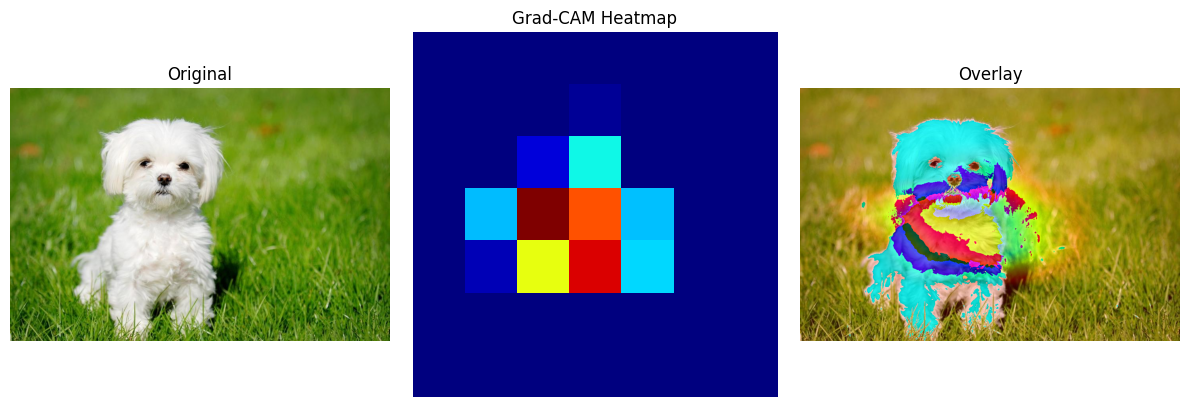

In [13]:
# Grad-CAM Demo on Pretrained CNN (ResNet50)

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from io import BytesIO

# --- Load Pretrained ResNet50 (Updated API) ---
from torchvision.models import resnet50, ResNet50_Weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()

# --- Load a Local Sample Image from TorchVision (Dog Image Alternative) ---
from torchvision.datasets.utils import download_url

# --- Load Image (same white dog image) ---
img_url = "https://specials-images.forbesimg.com/imageserve/5db4c7b464b49a0007e9dfac/960x0.jpg?fit=scale"
response = requests.get(img_url)
img_pil = Image.open(BytesIO(response.content)).convert("RGB")

# --- Preprocessing ---
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
img_tensor = transform(img_pil).unsqueeze(0)  # Add batch dimension

# --- Hook to get gradients ---
features = []
grads = []

def forward_hook(module, input, output):
    features.append(output)

def full_backward_hook(module, grad_input, grad_output):
    grads.append(grad_output[0])

# Attach hooks to the final conv layer
final_conv = model.layer4[2].conv3
final_conv.register_forward_hook(forward_hook)
final_conv.register_full_backward_hook(full_backward_hook)

# --- Forward pass ---
out = model(img_tensor)
pred_class = out.argmax().item()

# --- Backward pass ---
model.zero_grad()
out[0, pred_class].backward()

# --- Generate Grad-CAM ---
pooled_grads = torch.mean(grads[0], dim=[0, 2, 3])  # Global average pooling
activation = features[0][0]
for i in range(activation.shape[0]):
    activation[i, :, :] *= pooled_grads[i]
heatmap = torch.mean(activation, dim=0).detach().numpy()
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)  # Normalize

# --- Superimpose heatmap on original image ---
img_cv = np.array(img_pil)
heatmap_resized = cv2.resize(heatmap, (img_cv.shape[1], img_cv.shape[0]))
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
superimposed_img = heatmap_colored * 0.4 + img_cv

# --- Plot ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img_cv)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(heatmap, cmap='jet')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(superimposed_img.astype(np.uint8))
plt.axis("off")

plt.tight_layout()
plt.show()


### Interpretation of the Grad-CAM Output

- Left (Original Image): This is the raw input passed into the ResNet50 model — a white dog sitting on green grass. The image has been resized and normalized to fit the model’s input requirements.

- Center (Grad-CAM Heatmap): The heatmap shows where the model's internal layers are paying the most attention. In this case, the red and yellow regions are concentrated around the dog's head and torso, suggesting these parts were most critical to the model's predicted label.

- Right (Overlay): The heatmap has been superimposed on the image, clearly revealing that the model is focusing on the central features of the dog — likely its face, fur texture, and body outline. The background grass contributes very little to the prediction, which is a good sign of model reliability.

This is an effective demonstration of how Grad-CAM enables visual explanations of CNN decisions and can help confirm that the model is "looking" in semantically meaningful regions.

📌 **Reminder for Students:**

You first encountered Grad-CAM in Week 9, when we introduced Convolutional Neural Networks. Feel free to revisit that notebook for additional context and interactive visualization.

# Saliency Maps in Explainable AI (XAI)

Saliency maps are one of the earliest and most intuitive methods in the field of explainable AI. They aim to visualize which parts of an input image are most responsible for a model's decision by computing the gradient of the output score with respect to the input image.


### Key Concept

- For a given input and predicted class, we compute the gradient of the class score with respect to each pixel in the input image.
- The magnitude of this gradient tells us how sensitive the prediction is to changes in that specific pixel.
- Brighter areas in a saliency map indicate pixels that have a stronger influence on the model’s output.


### Why Use Saliency Maps?

- **Model-agnostic**: Works with any differentiable model (e.g., CNNs).
- **Simple and fast**: Only requires a forward and backward pass.
- **Good for intuition**: Helps understand *where* in the image the model is "looking."


### Limitations

- Often noisy and less structured than methods like Grad-CAM.
- Does not distinguish between positive and negative influence (just sensitivity).
- Harder to interpret for humans compared to colored overlays.


This section generates a saliency map using a pretrained ResNet50 model to visualize which pixels in an input image most influence the model’s prediction. By computing the gradient of the predicted class score with respect to the input image, it highlights important regions that contribute to the decision, providing a simple yet effective form of visual model interpretability.

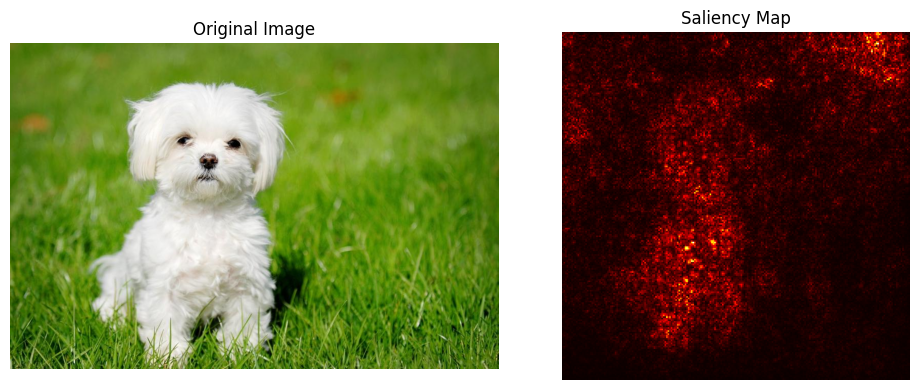

In [11]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import numpy as np

# Load pretrained model
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model.eval()

# Load and verify the image
url = "https://specials-images.forbesimg.com/imageserve/5db4c7b464b49a0007e9dfac/960x0.jpg?fit=scale"
response = requests.get(url)
if response.status_code == 200:
    img = Image.open(BytesIO(response.content)).convert('RGB')
else:
    raise ValueError("Failed to retrieve image. Status code:", response.status_code)

# Preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(img).unsqueeze(0)
input_tensor.requires_grad_()

# Forward pass
output = model(input_tensor)
pred_class = output.argmax().item()

# Backward pass
model.zero_grad()
output[0, pred_class].backward()

# Extract saliency and normalize for visualization
saliency = input_tensor.grad.data.abs().squeeze().max(dim=0)[0].cpu().numpy()
saliency = (saliency - saliency.min()) / (saliency.max() - saliency.min())

# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(saliency, cmap='hot')
plt.title("Saliency Map")
plt.axis("off")
plt.tight_layout()
plt.show()

### Interpretation of the Saliency Map:

- The left image shows a clear photo of a dog, which is ideal input for a model trained on natural images (like ResNet50 on ImageNet).

- The right image (saliency map) highlights areas of high gradient sensitivity:

  - You can see brighter red and yellow regions on the dog's head and body, indicating that the model’s prediction was most influenced by these areas.

  - This makes sense — the model is focusing on the parts of the image most characteristic of a dog.

# Model Bias and Fairness

In machine learning, bias refers not just to statistical error, but to systematic disparities in how models perform or treat different groups of people. Fairness in AI involves ensuring that automated systems make decisions that are equitable and do not reinforce existing societal inequalities. These concerns are especially critical in high-stakes applications such as lending, healthcare, hiring, criminal justice, and education.

### **Key Sources of Bias in Machine Learning:**

* **Historical Bias**: Data reflects historical and societal inequalities (e.g., underrepresentation of certain groups in hiring).
* **Sampling Bias**: Training data is not representative of the population the model will serve.
* **Measurement Bias**: Features or outcomes are inaccurately measured or inconsistently defined across groups.
* **Algorithmic Bias**: Model architecture or optimization criteria unintentionally favor majority or advantaged groups.

### **Types of Fairness Metrics:**

* **Demographic Parity (Statistical Parity)**: Positive outcome rates should be similar across groups.
* **Equalized Odds**: Error rates (false positives and false negatives) should be equal across groups.
* **Predictive Parity**: Predicted probabilities should be equally calibrated across different groups.
* **Individual Fairness**: Similar individuals should receive similar predictions.

No single definition of fairness is universally applicable—there are often trade-offs between competing definitions depending on context.

### **Bias Mitigation Techniques:**

* **Pre-processing**: Modify training data to reduce bias (e.g., reweighting or resampling).
* **In-processing**: Alter the training procedure to penalize biased behavior (e.g., fairness-constrained optimization).
* **Post-processing**: Adjust model outputs to equalize outcomes (e.g., threshold shifting).

### **Toolkits for Fairness Analysis:**

* IBM AI Fairness 360 (AIF360)
* Fairlearn (Microsoft)
* What-If Tool (Google)
* Themis-ML

### **Key Takeaways for Responsible AI:**

* Fairness is context-dependent and must be evaluated in collaboration with domain experts and affected stakeholders.
* Addressing bias is not just a technical task—it involves social, ethical, and legal considerations.
* Transparency, accountability, and continuous monitoring are essential for deploying fair and trustworthy models.

Bias in AI is not always avoidable, but its impact can be minimized through careful design, evaluation, and iteration.


# Accountability and AI Policy

As AI systems become increasingly embedded in decision-making processes that affect individuals and society, the need for accountability—the ability to assign responsibility and ensure oversight—becomes paramount. Alongside technical performance, models must also meet ethical, legal, and social standards. AI policy provides the governance structures, principles, and regulations that help guide responsible development and deployment of AI technologies.

### **What Is Accountability in AI?**

Accountability in AI refers to the mechanisms through which individuals or institutions can be held responsible for the behavior and consequences of AI systems. This includes:

* **Transparency**: Making models and decision processes understandable to users, auditors, and regulators.
* **Traceability**: Maintaining records of data sources, design choices, model versions, and evaluation processes.
* **Auditability**: Enabling external parties to assess compliance, fairness, and risk.
* **Responsibility Assignment**: Clearly defining who is responsible for various stages of the AI lifecycle—from data curation and model training to deployment and monitoring.

### **Key Policy and Regulatory Trends:**

* **EU AI Act**: A landmark regulatory proposal by the European Union that classifies AI systems based on risk (e.g., unacceptable, high, limited) and imposes specific obligations, especially for high-risk use cases.
* **U.S. AI Bill of Rights**: A framework proposed by the White House Office of Science and Technology Policy, outlining five principles including safe and effective systems, protection from algorithmic discrimination, and transparency.
* **OECD AI Principles**: Promote inclusive growth, human-centered values, transparency, robustness, and accountability.
* **Emerging National Frameworks**: Countries including Canada, Singapore, and the UK have also introduced AI ethics guidelines or data protection laws aligned with AI governance.

### **Principles for Accountable AI Development:**

* **Fairness**: Prevent discrimination and ensure equitable outcomes.
* **Privacy and Data Protection**: Limit data collection, enforce anonymization, and respect user consent.
* **Human Oversight**: Ensure meaningful human control over automated decisions.
* **Robustness and Security**: Minimize system failures and defend against adversarial attacks.

### **Practical Mechanisms for Accountability:**

* **Model Cards**: Standardized documentation describing the intended use, limitations, and performance of models.
* **Data Sheets for Datasets**: Similar documentation for datasets, describing data collection, preprocessing, and limitations.
* **Impact Assessments**: Formal evaluations of potential risks, harms, and benefits associated with AI deployment.

### **Why This Matters:**

Without clear accountability, the deployment of AI systems can lead to untraceable errors, unfair outcomes, or violations of rights. Accountability and policy are not only about avoiding harm but also about enabling public trust, long-term adoption, and responsible innovation in AI.

As future AI researchers and practitioners, students must understand the interplay between technical design and socio-legal contexts to build systems that are not just powerful—but trustworthy and aligned with human values.


### 🔍 Suggested Reading

📄 [Artificial Intelligence in Neuroradiology: A Scoping Review of Some Ethical Challenges](https://www.frontiersin.org/journals/radiology/articles/10.3389/fradi.2023.1149461/full)  

This paper outlines key ethical concerns—such as data privacy, bias, and accountability—raised by the use of AI in clinical neuroradiology. A practical case study to reflect on the broader implications discussed in this session.
